<a href="https://colab.research.google.com/github/j-claudinei-f/j-claudinei-f/blob/main/Mandelbrot_implicito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Fractais: O conjunto de mandelbrot**

José Claudinei Ferreira

Departamento de Matemática da Universidade Federal de Alfenas

Esta seção tem o objetivo de mostrar o efeito da escolha do tamanho de passo $h$ na resolução numérica de uma equação diferencial ordinária.

Para mostrar um pouco desse efeito escolhemos a equação diferencial, a valores complexos,  $$
%\label{mandedo}
\left\{\begin{array}{rcl}\frac{d\, z(t)}{dt}&=&z(t)^2-z(t)+c\\ z(0)&=&x_0+iy_0.\end{array}\right.,\tag{1}$$ em que $z(t)=x(t)+iy(t)$, $c=c_1+ic_2$, $i^2=-1$ e $x_0,\,y_0,\,c_1,\,c_2\in\mathbb{R}$.

Para $c=0.1+.3i$ podemos definir em linguagem R a função complexa $f_c(z)=z^2-z+c$ como 


In [2]:
c=.10+.3*1i
f<-function(U,c){U^2-U+c} 
f(0,c)

[1] 0.1+0.3i

e verificar que $f_c(1)=c$, por exemplo. Note que, por simplicidade, omitimos o índice $c$ na definição em linguagem R.

Vamos agora aproximar $z(20)$, de acordo com a Equação $(1)$, pelo método de Euler, com $h=1$, $z(0)=0$ e $z'(t)=f_c(z(t))$.

In [3]:
h=1; p=20/h; Z=0*(0:p)
Z[1]=0                # Condição inicial
for (i in 1:p){ 
Z[i+1]=Z[i]+h*f(Z[i],c) # Método de Euler
}
Z[p+1]                # Aproximação para z(20)
f(Z[p+1],c)

[1] 0.0073441+0.3044685i

[1] 8.739598e-06+3.600028e-06i

Podemos visualizar o caminho percorrido por essa aproximação através da figura a seguir, gerada pelos comandos 


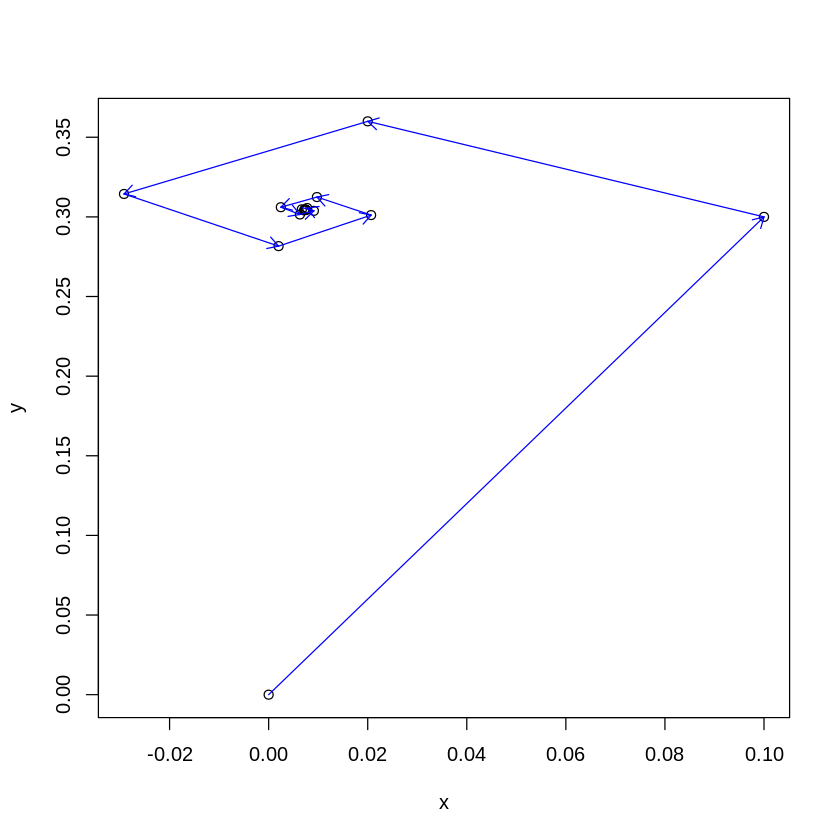

In [4]:
x=Re(Z); y=Im(Z); plot(x,y)
s <- seq(10); arrows(x[s], y[s], x[s+1], y[s+1], col = "blue",
length = 0.1, angle = 30)

Se tomarmos agora $h=0.1$ obtemos a figura  a seguir. Observamos que nos dois casos obtemos $z(20)\approx 0.0073441+0.3044685i$ e que que $f_c(z(20))\approx 0$, mas o trajeto é bem diferente.

[1] 0.0073489+0.3044751i

[1] -3.29141e-11+6.013016e-10i

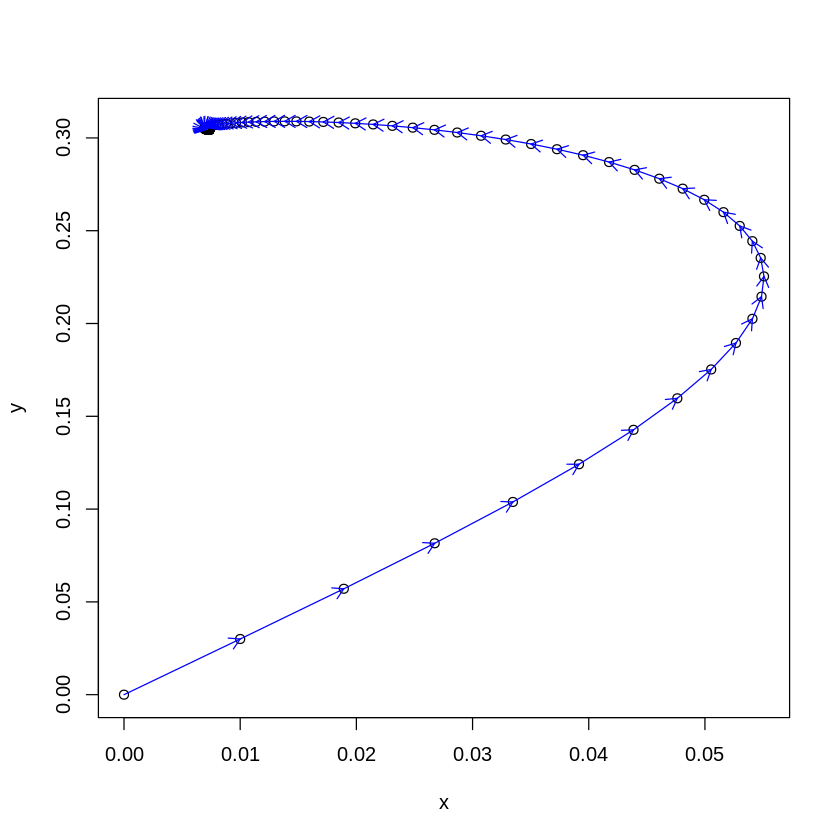

In [5]:
h=0.1; p=20/h; Z=0*(0:p)
Z[1]=0                # Condição inicial
for (i in 1:p){ 
Z[i+1]=Z[i]+h*f(Z[i],c) # Método de Euler
}
Z[p+1]                # Aproximação para z(20)
f(Z[p+1],c)

x=Re(Z); y=Im(Z); plot(x,y)
s <- seq(70)

arrows(x[s], y[s], x[s+1], y[s+1], col = "blue",length = 0.1, angle = 30)

Surge então a seguinte questão: Para que valores de $c$, a solução $z(t)$ da Equação $(1)$, com $z(0)=0$, é uma aproximação para uma raiz da equação $f_c(z)=0$? Isso seria útil e daria contribuição para a resolução de equações polinomiais.

Para tentar pensar nessa pergunta geramos a figura a seguir, testando um número grande de constantes $c\in [-1.7,0.5]\times[-1.1,1.1]$ e utilizando o método de Euler, com $h=1$, para aproximar $z(t)$ para alguns valores de $t$ no intervalo $[0,200]$. A parte escura da imagem é, aproximadamente, onde a aproximação numérica para $z(t)$ é limitada.\ Essa imagem é conhecida como [conjunto de Mandelbrot](https://en.wikipedia.org/wiki/Mandelbrot_set) e definida a partir da sequência $z_{n+1}=z_n^2+c$, com $z_0=0$.
	

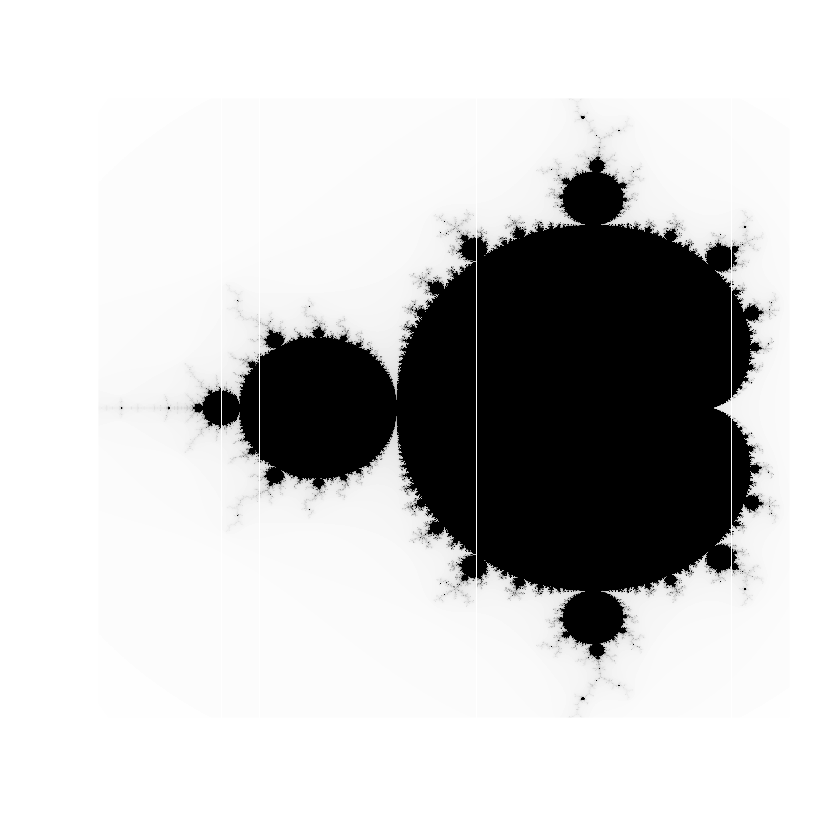

In [6]:
s=seq(-1.7,0.5,by=0.001); t=seq(-1.1,1.1,by=0.001); # Escolha de pontos para teste.
n=length(s); A=matrix(0,n,n); h=1; p=200

for (i in 1:n){ for (j in 1:n){Y=0; c=s[i]+t[j]*1i
	f<-function(U){U^2-U+c} 
	for (l in 1:p){ Y=Y+h*f(Y)                          # Método de Euler
		if ( abs(Y)>=2){K=l; break}                     # Controle de limitação 
		else {K=p}}   
	A[i,j]=K}}

image(A,axes=FALSE,col=gray((p:0)/p))               # Geração de imagem

Embora nossa pergunta tenha sido sobre aproximar raízes de $f_c(z)=0$, inspirados pelo conjunto de Mandelbrot, fazemos mais alguns testes usando a limitação da aproximação para $z(t)$. Tomando $h=0.5$, e fazendo pequenas alterações no código em R, obtemos a figura que segue, testando um número grande de constantes $c\in [-8,1.5]\times[-4.75,4.75]$. A parte escura da imagem é, aproximadamente, onde a aproximação numérica para $z(t)$ é limitada.


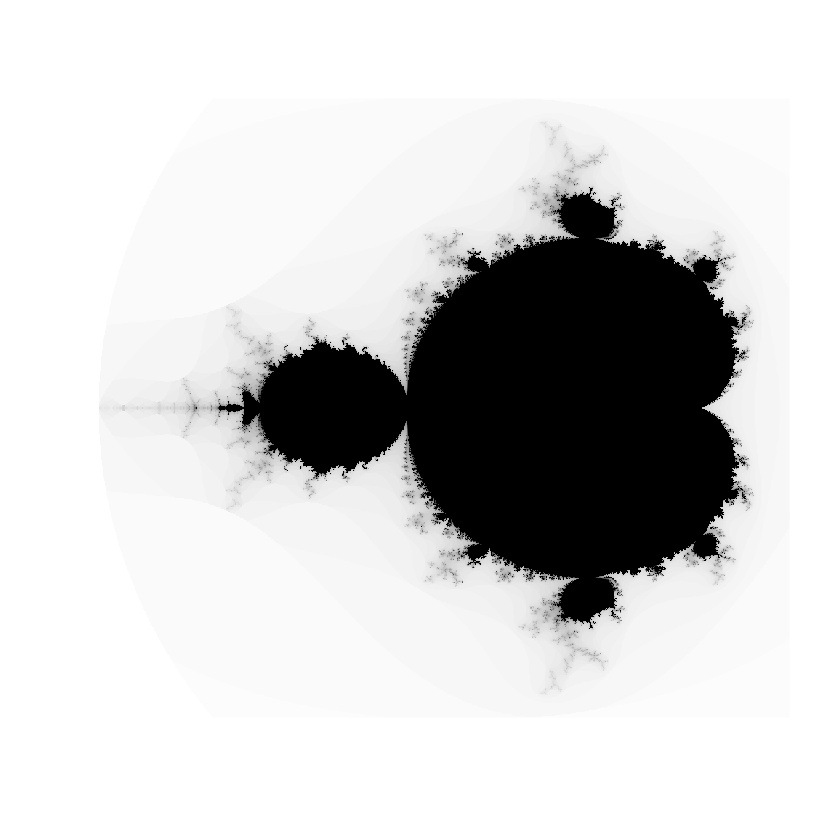

In [7]:
s=seq(-8,1.5,by=0.01); t=seq(-4.75,4.75,by=0.01); # Escolha de pontos para teste.
n=length(s); A=matrix(0,n,n); h=0.5; p=100

for (i in 1:n){ for (j in 1:n){Y=0; c=s[i]+t[j]*1i
	f<-function(U){U^2-U+c} 
	for (l in 1:p){ Y=Y+h*f(Y)                          # Método de Euler
		if ( abs(Y)>=4){K=l; break} else {K=p}}   
	A[i,j]=K}}

image(A,axes=FALSE,col=gray((p:0)/p))               # Geração de imagem

Tomando agora $h=0.1$ e usando código que segue, obtemos as figura abaixo, testando um número grande de constantes $c\in [-120,20]\times[-120,120]$.


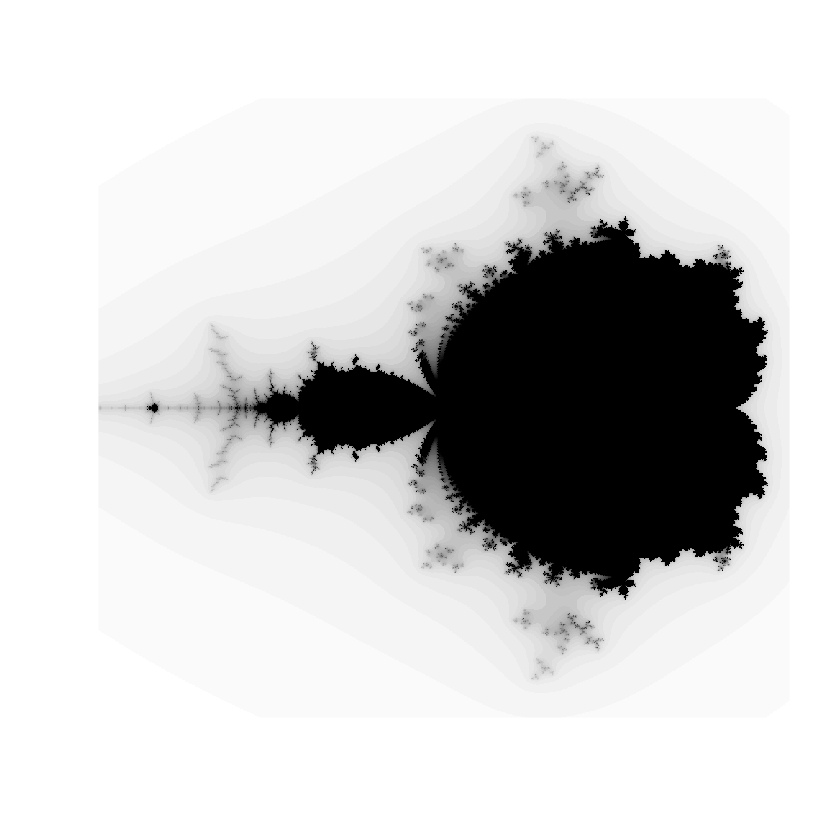

In [8]:
s=seq(-220,20,by=0.25); t=seq(-120,120,by=0.25); # Escolha de pontos para teste.
n=length(s); A=matrix(0,n,n); h=0.1; p=50
for (i in 1:n){ for (j in 1:n){Y=0; c=s[i]+t[j]*1i
	f<-function(U){U^2-U+c} 
	for (l in 1:p){ Y=Y+h*f(Y)                          # Método de Euler
		if (is.na(Y)){K=l; break} else {
			if (abs(Y)>=400){K=l;break} else {K=p} } }  
	A[i,j]=K } }

image(A,axes=FALSE,col=gray((p:0)/p))               # Geração de imagem

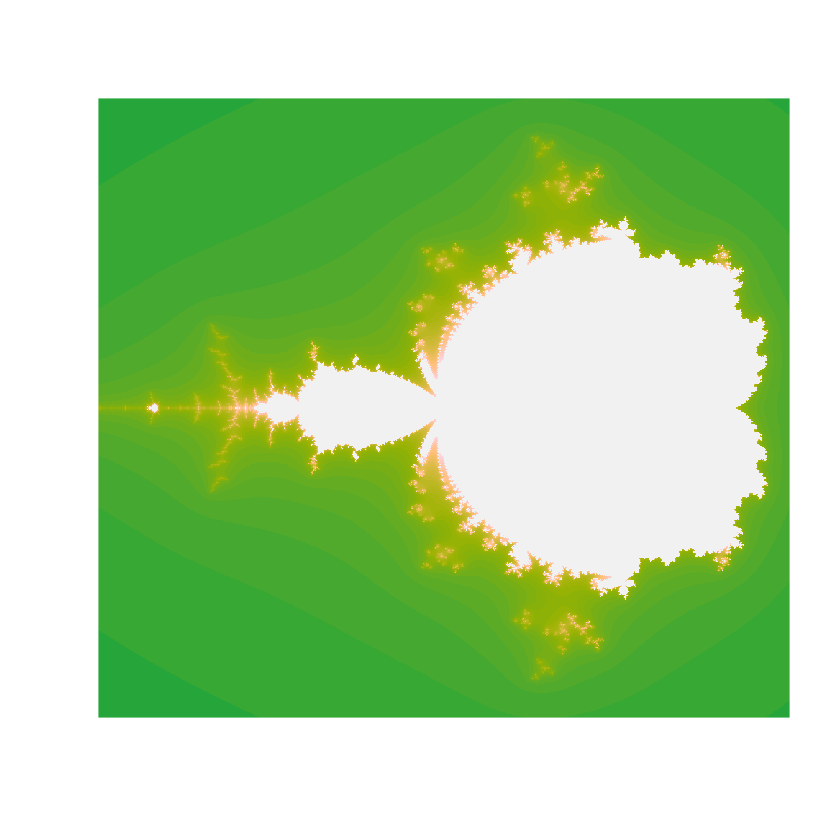

In [9]:
image(A,axes=FALSE,col= hcl.colors(100, "terrain"))    

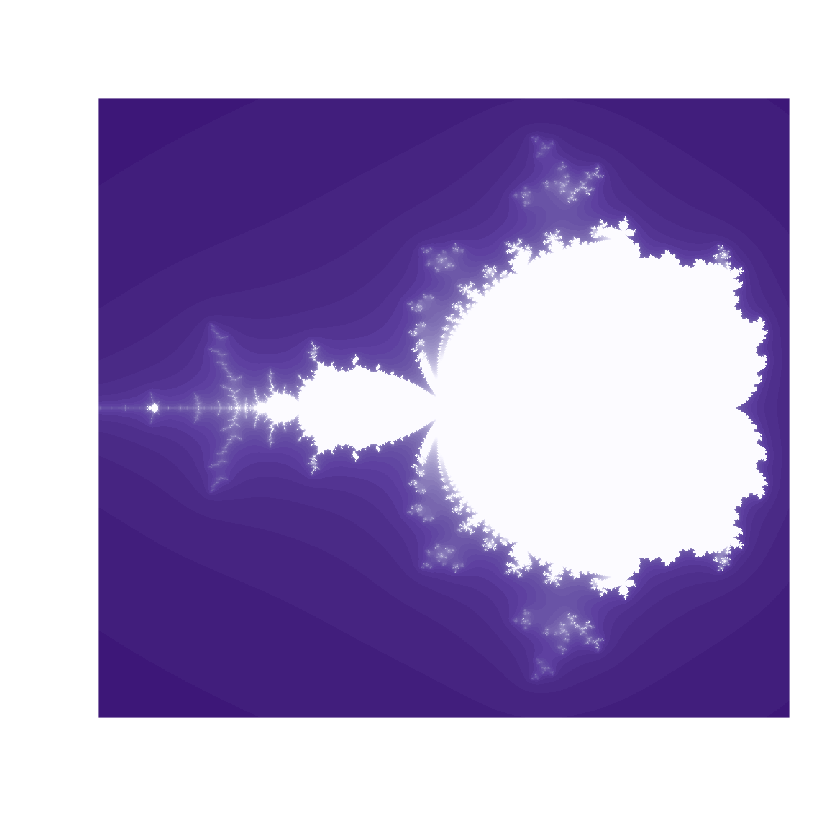

In [10]:
image(A,axes=FALSE,col= hcl.colors(100, "purples"))   

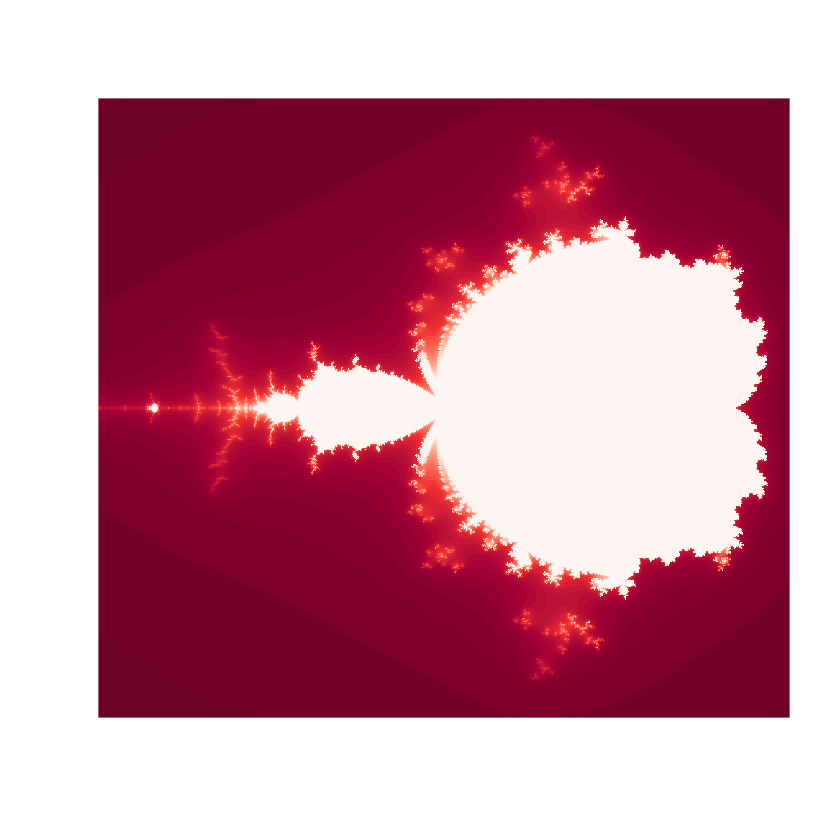

In [11]:
image(A,axes=FALSE,col= hcl.colors(100, "reds"))

Warning message in plot.window(...):
“"ch.col" is not a graphical parameter”
Warning message in plot.xy(xy, type, ...):
“"ch.col" is not a graphical parameter”
Warning message in title(...):
“"ch.col" is not a graphical parameter”


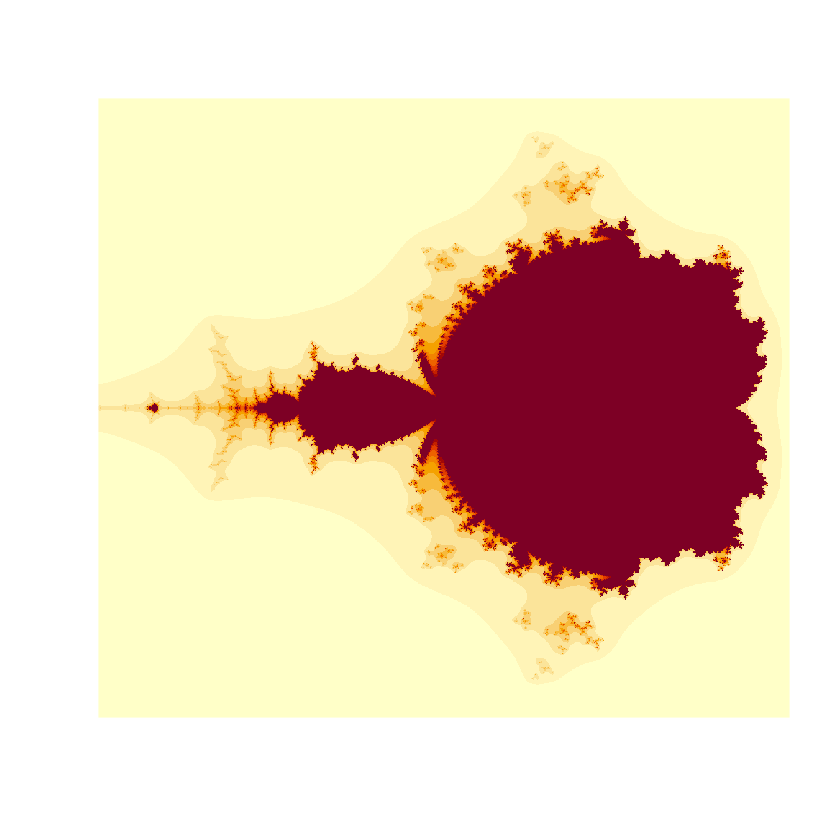

In [12]:
image(A,axes=FALSE, ch.col = c("rainbow(n, start=.9, end=.1)", "heat.colors(n)",
                      "terrain.colors(n)", "topo.colors(n)",
                      "cm.colors(n)"))  

A parte escura da imagem é, aproximadamente, onde a aproximação numérica para $z(t)$ é limitada. Cabe notar que se tomarmos $h=2$ e  $c\in [-0.3,0.3]\times[-0.3,0.3]$ obtemos figura quase idêntica a figuras anteriores. Isso mostra, de certa forma, a influência na escolha de $h$ para uma boa aproximação numérica.

Voltando a nossa pergunta, nem precisamos alterar o código em linguagem R para perceber que se exigirmos a limitação de $f(z(t))$ vamos obter as mesmas figuras. 
Se tomarmos, por exemplo, $c=200+200i$ e $h=0.01$ obtemos a primeira figura que segue. Observamos que  $z(20)\approx -5.93879+15.53087i$, que $f_c(z(20))\approx 0$ e que o trajeto é limitado, ou seja, parece que, quanto menor for $h$ maior será a região em que a aproximação para $z(t)$ é limitada. Note que, para $h=0.019$ obtemos a segunda figura que segue, em que a aproximação para $z(t)$ quase escapa da limitação.

Escolhendo alguns valores de $c$ vemos que o conjunto solução das equações $f_c(z)=0$ parece atrair as aproximações numéricas para $z(t)$, que é solução da Equação $(1)$,  para $t$ grande. Um pouco mais de simulações, para esse exemplo, sugere também que  as soluções que têm essa atração são aquelas que possuem parte real negativa. Isso, de certa forma, nos diz que nem toda raiz de $f_c(z)$ pode ser aproximada por este procedimento.

[1] -5.93879+15.53087i

[1] 2.842171e-14-8.526513e-14i

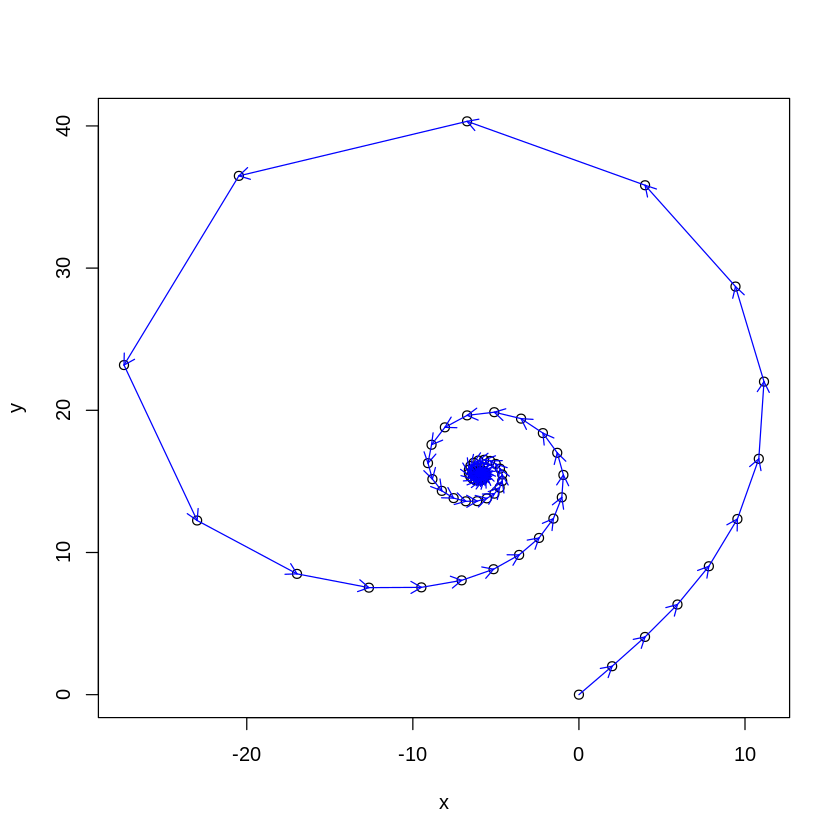

In [ ]:
h=0.01; p=20/h; Z=0*(0:p)
c=200+200*1i
Z[1]=0                # Condição inicial
for (i in 1:p){ 
Z[i+1]=Z[i]+h*f(Z[i],c) # Método de Euler
}
Z[p+1]                # Aproximação para z(20)
f(Z[p+1],c)

x=Re(Z); y=Im(Z); plot(x,y)
s <- seq(90)

arrows(x[s], y[s], x[s+1], y[s+1], col = "blue",length = 0.1, angle = 30)

[1] -5.93879+15.53087i

[1] 2.273737e-13+5.68434e-14i

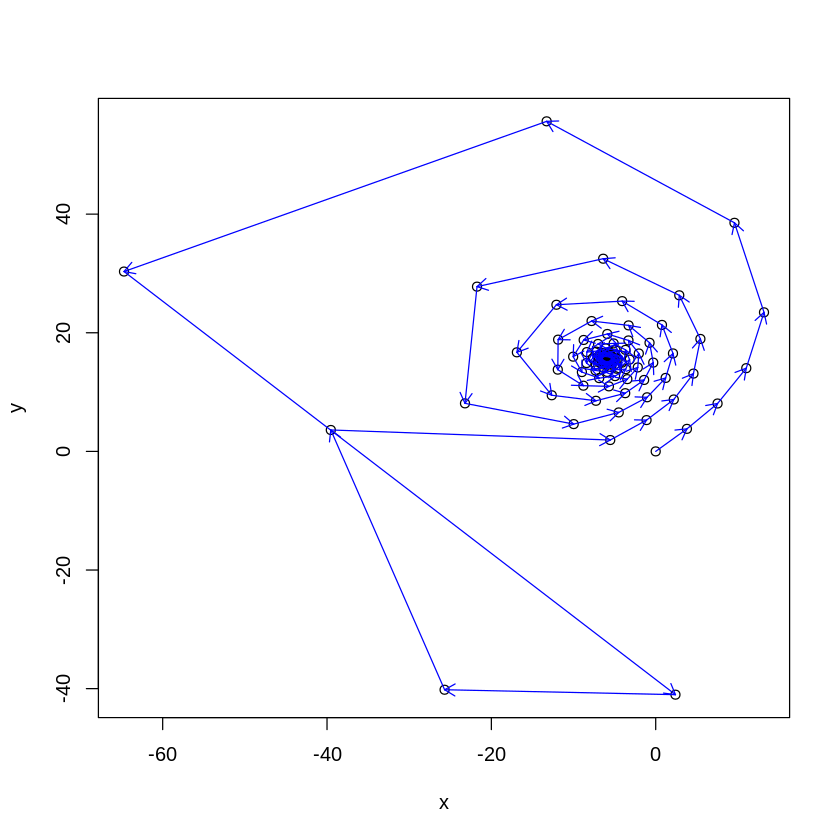

In [ ]:
h=0.019; p=20/h; Z=0*(0:p)
c=200+200*1i
Z[1]=0                # Condição inicial
for (i in 1:p){ 
Z[i+1]=Z[i]+h*f(Z[i],c) # Método de Euler
}
Z[p+1]                # Aproximação para z(20)
f(Z[p+1],c)

x=Re(Z); y=Im(Z); plot(x,y)
s <- seq(90)

arrows(x[s], y[s], x[s+1], y[s+1], col = "blue",length = 0.1, angle = 30)

#**Contorno do conjunto de Mandelbrot de forma implícita**

<font color=red> Ainda é preciso incluir descrição!

[1] 1 2

[1] -2  6

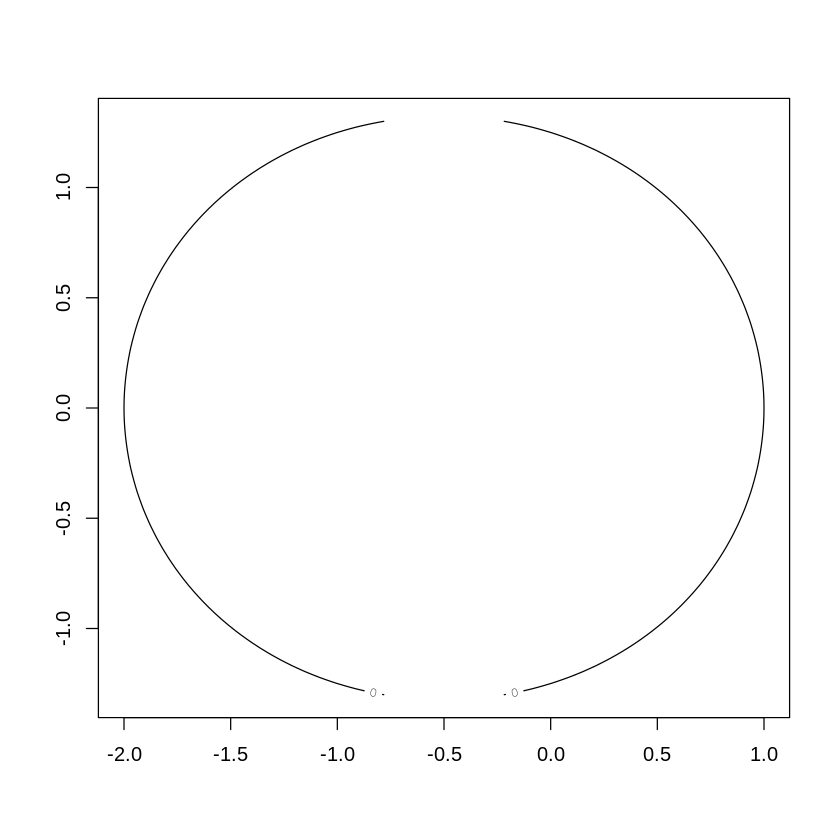

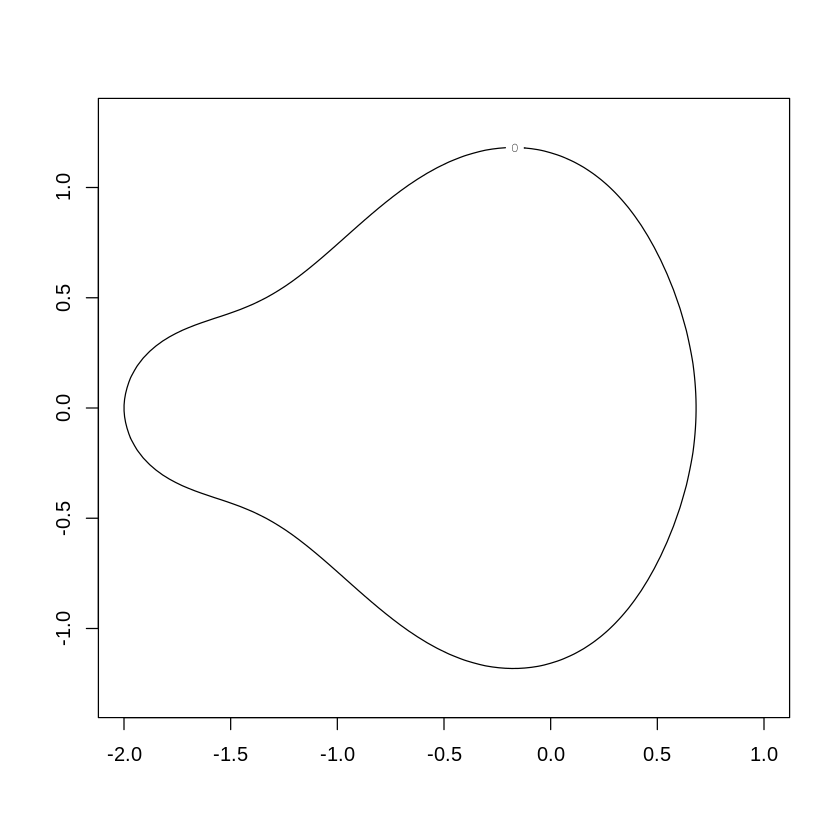

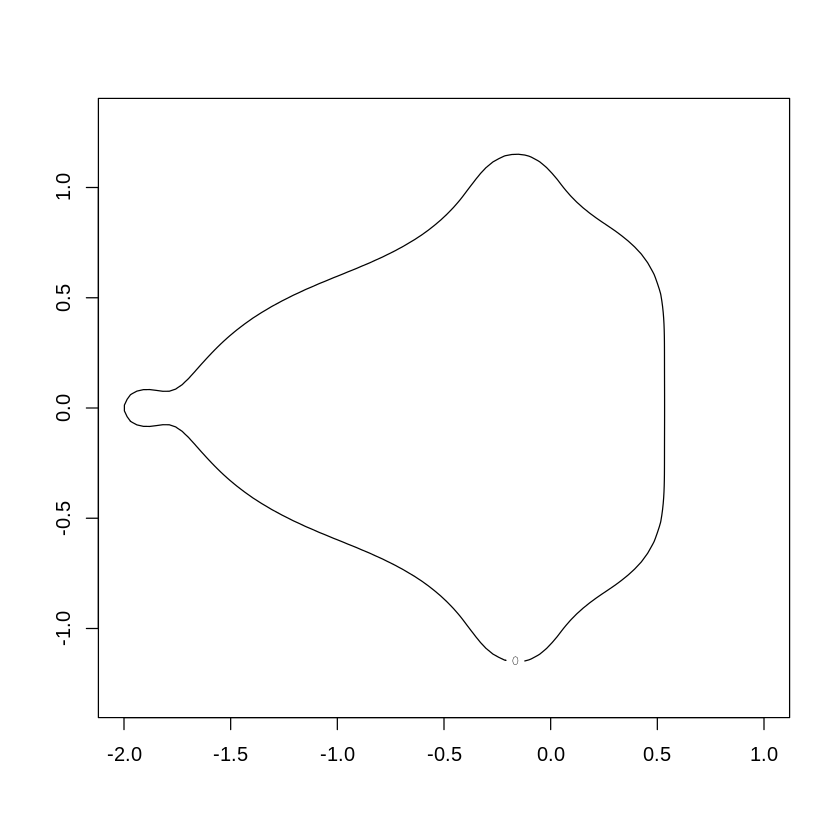

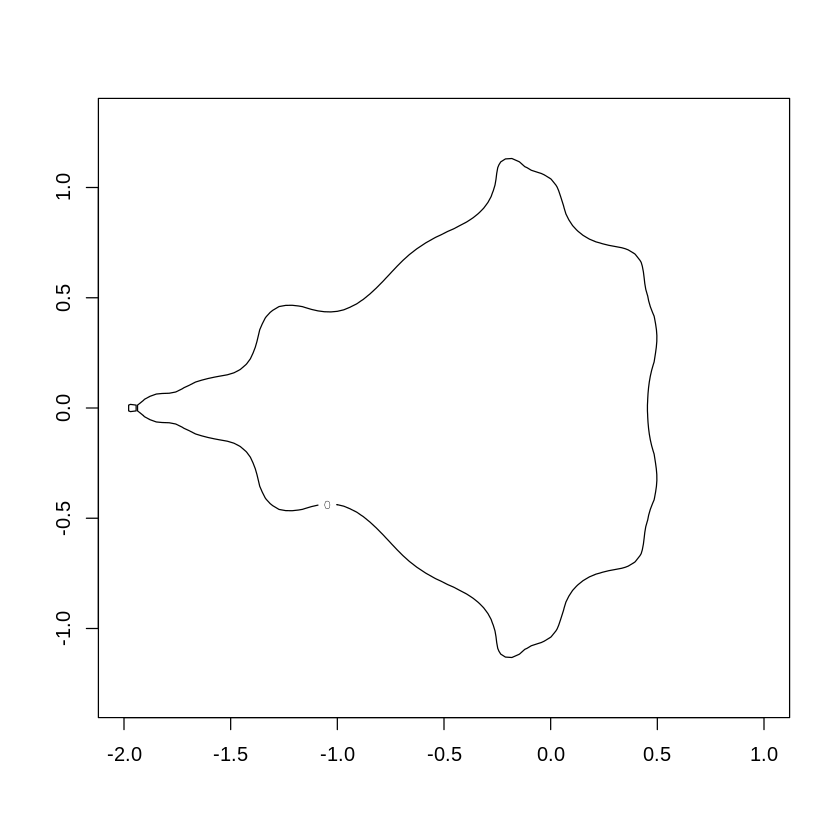

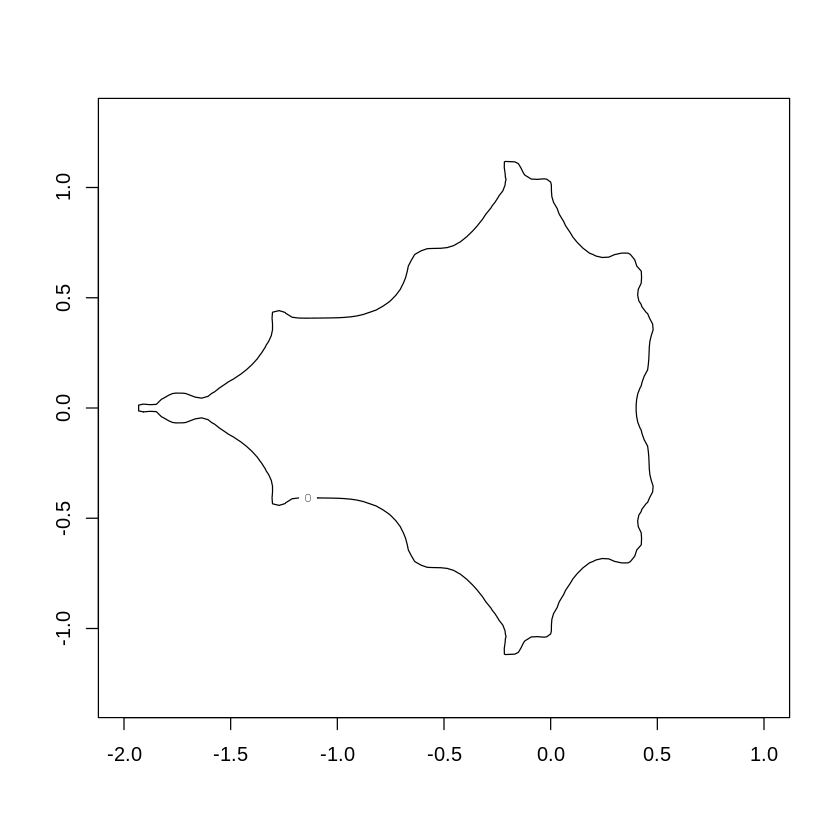

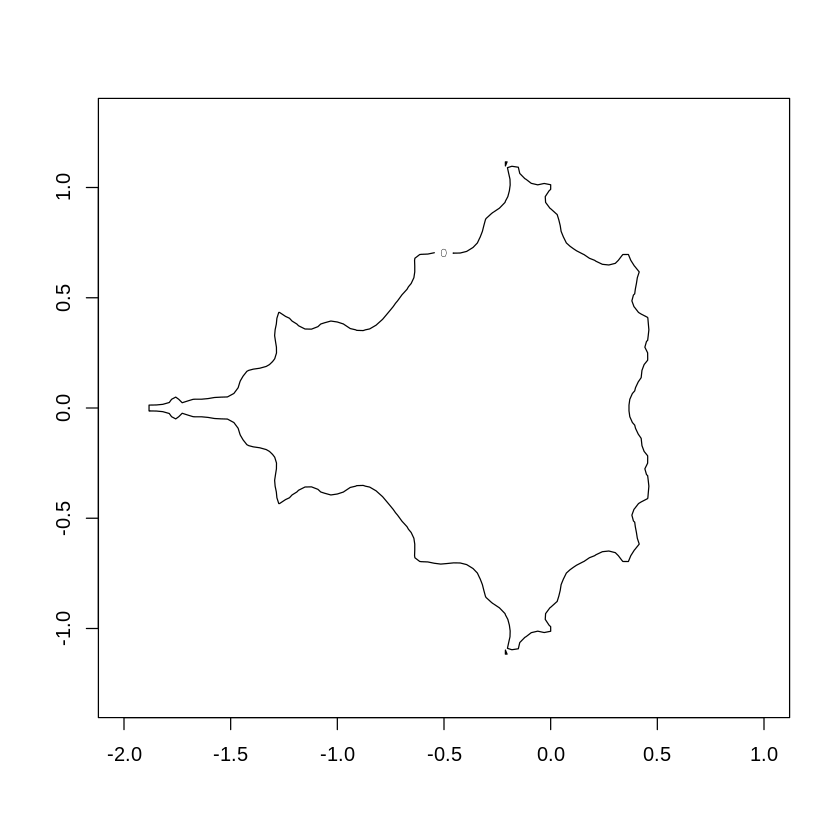

In [ ]:
f<-function(x,y,p){
if (p==0){q=c(x,y)}
else{q=c((f(x,y,p-1)[1])^2-(f(x,y,p-1)[2])^2+x,2*(f(x,y,p-1)[1])*(f(x,y,p-1)[2])+y)}
return(q)
}

f(1,2,0)
f(1,2,1)

for (p in 1:6){

mf<-function(x,y,p){(f(x,y,p)[1])^2+(f(x,y,p)[2])^2}
mf(1,2,0)


m=100
my.fun <- function(x,y){mf(x,y,p)-4}
x<-seq(-2,1,length=m)
y<-seq(-1.3,1.3,length=m)
z=matrix(0,m,m)

for (i in 1:m){ for (j in 1:m){z[i,j]=my.fun(x[i],y[j])}}
contour(x,y,z,level=0)
}